Задача: распределить новые точки продаж по имеющимся сегментам (классификация).

In [1]:
# https://tproger.ru/translations/scikit-learn-in-python/

# обработка
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

# визуализация
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

# моделирование
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

In [2]:
df_old = pd.read_excel('D:\\Work\\data\\telecom\\filials_old.xlsx') # старые точки продаж
df_new = pd.read_excel('D:\\Work\\data\\telecom\\filials_new.xlsx') # новые точки продаж, подлежащие классификации

df_old.head(10)

,Регион,Филиал,Категории доступных продуктов,База клиентов,Активные клиенты в текущем месяце,Активные клиенты за 3 месяца,Новые клиенты,Пользователи трафика данных,Пользователи голосовых услуг,Выручка,Новая выручка,"Трафик, данные","Трафик, минут",Выручка на абонента,Стоимость минуты,Стоимость мегабайта,Сегмент
0,PoО,1,6,0,0,0,0,5,6,5577.90,0.00,28908.00,6077.20,0.00,0.00,0.00,1
1,АмО,1,1,1715,472,451,0,306,85,22586.05,0.00,3705.49,23284.82,3529.87,646.00,806.51,1
2,АмО,1,2,351,286,306,1,156,243,181412.09,43.75,846382.89,128961.85,11523.80,5533.23,23615.56,1
3,АмО,1,3,501,224,232,2,166,9,90806.10,729.47,433112.76,215.97,4816.10,12.47,25283.65,1
4,АмО,1,4,3669,2022,2209,50,355,1729,318288.66,0.00,264564.63,598514.08,9842.36,7477.43,12043.12,1
5,АмО,1,5,720,617,675,0,454,584,407882.24,0.00,1384128.63,420528.08,9460.49,6181.75,22842.69,1
6,АмО,1,6,159,114,136,0,81,122,45856.05,0.00,532833.88,51182.78,11395.77,10224.48,79526.96,1
7,АмО,1,7,46,35,46,0,30,34,28669.49,0.00,244422.86,17379.87,4571.24,3730.08,65163.38,1
8,АмО,1,8,4,4,4,0,4,4,2140.20,0.00,65741.16,1577.28,2140.20,1577.28,65741.15,1
9,АмО,1,1,6939,4615,4764,214,971,1335,180285.17,4293.31,101510.20,45101.28,8886.13,714.57,16011.49,2


In [3]:
# сводные данные по имеющейся классификации

df_old.describe().T

,count,mean,std,min,25%,50%,75%,max
Филиал,2999.00,4.48,2.30,1.00,2.00,5.00,6.00,8.00
Категории доступных продуктов,2999.00,4.20,2.20,1.00,2.00,4.00,6.00,8.00
База клиентов,2999.00,3908.04,30932.26,0.00,46.00,422.00,2068.50,1204477.00
Активные клиенты в текущем месяце,2999.00,2444.35,15809.39,0.00,32.00,298.00,1483.50,655455.00
Активные клиенты за 3 месяца,2999.00,2522.06,16068.98,0.00,38.00,333.00,1589.00,653175.00
Новые клиенты,2999.00,99.13,1392.36,0.00,0.00,2.00,23.00,53421.00
Пользователи трафика данных,2999.00,1391.93,10399.20,0.00,16.00,126.00,616.50,381943.00
Пользователи голосовых услуг,2999.00,1178.11,4942.24,0.00,8.00,95.00,757.00,147172.00
Выручка,2999.00,631687.64,3908962.88,-172096.93,11483.40,78328.98,336095.93,120339677.64
Новая выручка,2999.00,8866.87,48685.78,-36762.05,0.00,107.56,2619.60,1346331.13


In [4]:
# в регионах разное количество сегментов

df_old[['Регион', 'Сегмент']].groupby(['Регион'])['Сегмент'].nunique().to_frame()[:10]

,Сегмент
Регион,
PoО,2
АбО,5
АдО,6
АмО,6
АрО,5
АсО,5
БаО,5
БеО,6
БрО,5


In [5]:
# и очень разное количество точек

df_old[['Регион', 'Сегмент']].groupby(['Регион'])['Сегмент'].count().to_frame()[:10]

,Сегмент
Регион,
PoО,8
АбО,35
АдО,29
АмО,40
АрО,37
АсО,36
БаО,35
БеО,35
БрО,36


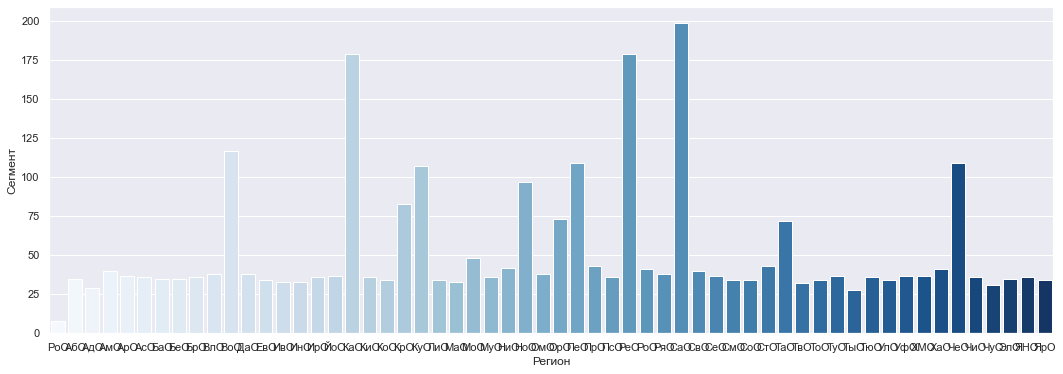

In [6]:
# тоже самое на графике позволяет увидеть, что в некоторых регионах точек особенно много

df_reg = df_old[['Регион', 'Сегмент']].groupby(['Регион'])['Сегмент'].count().to_frame()
plt.figure(figsize=(18, 6))
sns.barplot(x=df_reg.index, y='Сегмент', data=df_reg, palette='Blues')

In [7]:
df_old

,Регион,Филиал,Категории доступных продуктов,База клиентов,Активные клиенты в текущем месяце,Активные клиенты за 3 месяца,Новые клиенты,Пользователи трафика данных,Пользователи голосовых услуг,Выручка,Новая выручка,"Трафик, данные","Трафик, минут",Выручка на абонента,Стоимость минуты,Стоимость мегабайта,Сегмент
0,PoО,1,6,0,0,0,0,5,6,5577.90,0.00,28908.00,6077.20,0.00,0.00,0.00,1
1,АмО,1,1,1715,472,451,0,306,85,22586.05,0.00,3705.49,23284.82,3529.87,646.00,806.51,1
2,АмО,1,2,351,286,306,1,156,243,181412.09,43.75,846382.89,128961.85,11523.80,5533.23,23615.56,1
3,АмО,1,3,501,224,232,2,166,9,90806.10,729.47,433112.76,215.97,4816.10,12.47,25283.65,1
4,АмО,1,4,3669,2022,2209,50,355,1729,318288.66,0.00,264564.63,598514.08,9842.36,7477.43,12043.12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,ТуО,8,3,14,14,14,0,13,0,9033.96,0.00,12114.65,0.00,2934.72,0.00,3215.05,5
2995,ТуО,8,4,71,12,26,0,1,13,1588.79,0.00,0.20,2180.08,564.50,937.19,0.10,5
2996,ТуО,8,5,5,5,5,0,0,4,2083.36,0.00,0.00,798.77,416.67,159.75,0.00,5
2997,ТуО,8,2,13,13,13,0,0,0,2067.71,0.00,0.00,0.00,473.25,0.00,0.00,6


In [8]:
# стандартизируем все численные переменные через MinMaxScaler

scaler = MinMaxScaler()

def some_scaler(data):
    for i in data.columns[1:16]:
        col = scaler.fit_transform(data[i].values.reshape(-1, 1))
        i_scaled=pd.DataFrame(col, columns=[i]) 
        data[i] = i_scaled

In [9]:
some_scaler(df_old)
df_old

,Регион,Филиал,Категории доступных продуктов,База клиентов,Активные клиенты в текущем месяце,Активные клиенты за 3 месяца,Новые клиенты,Пользователи трафика данных,Пользователи голосовых услуг,Выручка,Новая выручка,"Трафик, данные","Трафик, минут",Выручка на абонента,Стоимость минуты,Стоимость мегабайта,Сегмент
0,PoО,0.00,0.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,1
1,АмО,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,1
2,АмО,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.03,0.02,1
3,АмО,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.02,1
4,АмО,0.00,0.43,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.03,0.00,0.01,0.34,0.05,0.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,ТуО,1.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,5
2995,ТуО,1.00,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.01,0.00,5
2996,ТуО,1.00,0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,5
2997,ТуО,1.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,6


In [10]:
# сделаем дамми переменные для учета особенностей каждого

dummies_old = pd.get_dummies(df_old['Регион']) # для старых точек
df_old = pd.concat([dummies_old, df_old], axis=1)
del df_old['Регион']

dummies_new = pd.get_dummies(df_new['Регион']) # для новых точек
df_new = pd.concat([dummies_new, df_new], axis=1)
del df_new['Регион']

df_old

,PoО,АбО,АдО,АмО,АрО,АсО,БаО,БеО,БрО,ВлО,...,Пользователи трафика данных,Пользователи голосовых услуг,Выручка,Новая выручка,"Трафик, данные","Трафик, минут",Выручка на абонента,Стоимость минуты,Стоимость мегабайта,Сегмент
0,1,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,1
1,0,0,0,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,1
2,0,0,0,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.03,0.02,1
3,0,0,0,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.02,1
4,0,0,0,1,0,0,0,0,0,0,...,0.00,0.01,0.00,0.03,0.00,0.01,0.34,0.05,0.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,5
2995,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.01,0.00,5
2996,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,5
2997,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,6


In [11]:
# подготовим данные для обучения моделей

X = df_old.iloc[:, :-1] # переменные для обучения
y = df_old['Сегмент'] # целевая переменная

In [12]:
# разделим на трейн и тест старые метки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=13)  

In [13]:
# создадим словарь для сравнения моделей

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB()
}

In [14]:
# функция для обучения нескольких моделей

def batch_classify(X_train, y_train, X_test, y_test, no_classifiers = 1, verbose = True):
    models = {}
    for classifier_name, classifier in list(classifiers.items())[:no_classifiers]:
        classifier.fit(X_train, y_train)
        train_score = classifier.score(X_train, y_train)
        test_score = classifier.score(X_test, y_test)
        
        models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score}
    return models

def display_models(models, sort_by='test_score'):
    cls = [key for key in models.keys()]
    test_s = [models[key]['test_score'] for key in cls]
    training_s = [models[key]['train_score'] for key in cls]
    
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls), 3)), columns = ['classifier', 'train_score', 'test_score'])
    for i in range(0, len(cls)):
        df_.loc[i, 'classifier'] = cls[i]
        df_.loc[i, 'train_score'] = training_s[i]
        df_.loc[i, 'test_score'] = test_s[i]
    
    display(df_.sort_values(by=sort_by, ascending=False))

In [15]:
models = batch_classify(X_train, y_train, X_test, y_test, no_classifiers = 8)
display_models(models)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,classifier,train_score,test_score
3,Gradient Boosting Classifier,1.00,0.53
5,Random Forest,1.00,0.51
4,Decision Tree,1.00,0.44
6,Neural Net,0.35,0.30
0,Logistic Regression,0.34,0.22
2,Linear SVM,0.28,0.13
7,Naive Bayes,0.17,0.12
1,Nearest Neighbors,0.37,0.07


In [ ]:
# улучшим гиперпараметры наиболее эффективных подходов

GDB_params = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.5, 0.1, 0.01, 0.001],
    'criterion': ['friedman_mse', 'mse', 'mae'] # параметры для перебора
}

for n_est in GDB_params['n_estimators']:
    for lr in GDB_params['learning_rate']:
        for crit in GDB_params['criterion']:
            clf = GradientBoostingClassifier(n_estimators=n_est, 
                                             learning_rate = lr,
                                             criterion = crit)
            clf.fit(X_train, y_train)
            train_score = clf.score(X_train, y_train)
            test_score = clf.score(X_test, y_test)
            print("For ({}, {}, {}) - train, test score: \t {:.5f} \t-\t {:.5f}".format(n_est, lr, crit[:4], train_score, test_score))

In [16]:
SVC_model = SVC()  
# В KNN-модели нужно указать параметр n_neighbors
# Это число точек, на которое будет смотреть 
# классификатор, чтобы определить, к какому классу принадлежит новая точка
KNN_model = KNeighborsClassifier(n_neighbors=5) 

In [17]:
SVC_model.fit(X_train, y_train) 
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
SVC_prediction = SVC_model.predict(X_test) 
KNN_prediction = KNN_model.predict(X_test)

In [19]:
# Оценка точности — простейший вариант оценки работы классификатора
print(accuracy_score(SVC_prediction, y_test))  
print(accuracy_score(KNN_prediction, y_test))  
# Но матрица неточности и отчёт о классификации дадут больше информации о производительности
print(confusion_matrix(SVC_prediction, y_test))  
print(classification_report(KNN_prediction, y_test))

0.13166666666666665
0.07166666666666667
[[46 90 94 77 46  9]
 [21 12 14 11  6  1]
 [33 28 15 27 11  3]
 [14  3 15  5  7  3]
 [ 1  1  3  3  1  0]
 [ 0  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.19      0.09      0.12       253
           2       0.05      0.07      0.06        97
           3       0.04      0.04      0.04       116
           4       0.03      0.06      0.04        69
           5       0.07      0.08      0.08        61
           6       0.00      0.00      0.00         4

    accuracy                           0.07       600
   macro avg       0.06      0.06      0.06       600
weighted avg       0.11      0.07      0.08       600



In [ ]:
df.groupby(['FILIAL_NAME'])['Сумма по полю Выручка'].sum().to_frame().sort_values(by='Сумма по полю Выручка', ascending=False).hist()

In [ ]:
df.groupby(['Период'])['Сумма по полю Новые клиенты'].count().sort_values()

In [ ]:
df['Регион'].unique()

In [ ]:
df.columns

In [ ]:
df[df['Регион'] != 'МоО'].groupby(['FILIAL_NAME', 'Регион'])['SUBSEGMENT_NAME', 'Категории продуктов', 'Сумма по полю База клиентов',
       'Сумма по полю Активные клиенты в текущем месяце',
       'Сумма по полю Активные клиенты за 3 посл месяца',
       'Сумма по полю Новые клиенты',
       'Сумма по полю Пользователи трафика данных',
       'Сумма по полю Пользователи голосовых услуг', 'Сумма по полю Выручка',
       'Сумма по полю Новая выручка', 'Сумма по полю Трафик, данные',
       'Сумма по полю Трафик, минут', 'Сумма по полю Выручка на абонента',
       'Стоимость минуты', 'Стоимость мегабайта'].sum().sort_values(by='Сумма по полю Выручка', ascending=False)

In [ ]:
df_groups = df[df['Регион'] != 'МоО'].groupby(['FILIAL_NAME', 'Регион'])['SUBSEGMENT_NAME', 'Категории продуктов', 'Сумма по полю База клиентов',
       'Сумма по полю Активные клиенты в текущем месяце',
       'Сумма по полю Активные клиенты за 3 посл месяца',
       'Сумма по полю Новые клиенты',
       'Сумма по полю Пользователи трафика данных',
       'Сумма по полю Пользователи голосовых услуг', 'Сумма по полю Выручка',
       'Сумма по полю Новая выручка', 'Сумма по полю Трафик, данные',
       'Сумма по полю Трафик, минут', 'Сумма по полю Выручка на абонента',
       'Стоимость минуты', 'Стоимость мегабайта'].sum().sort_values(by='Сумма по полю Выручка', ascending=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

df_groups_scale = np.nan_to_num(df_groups) 
df_groups_scale = StandardScaler().fit_transform(df_groups_scale)

In [ ]:
df_groups_scale

In [ ]:
distortions = []
mapping = {}
K = range(1,10) # вариация в 10 кластеров

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_groups_scale)
    kmeanModel.fit(df_groups_scale)    
    distortions.append(sum(np.min(cdist(df_groups_scale, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_groups_scale.shape[0])
   
    mapping[k] = sum(np.min(cdist(df_groups_scale, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_groups_scale.shape[0]
    
for key,val in mapping.items():
    print(str(key)+' : '+str(val))
        

plt.plot(K, distortions, 'bx-')
plt.xlabel('values of clusters')
plt.ylabel('distortion')
plt.show()

In [ ]:
cluster_num = 3
k_means = KMeans(init = 'k-means++', n_clusters = cluster_num, n_init = 20, random_state = 42)
k_means.fit(df_groups_scale)
labels = k_means.labels_
df_groups['cluster'] = labels

In [ ]:
df_groups.groupby(['cluster']).count()

In [ ]:
df_groups.groupby(['cluster']).mean()

In [ ]:
df_groups[df_groups['cluster']==1]